In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
from fishTry_temp import fishnet99
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
#transforms.Resize((224,224), Image.BICUBIC),
transform=transforms.Compose([transforms.Resize((224,224), Image.BICUBIC),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                    std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = '/usr/local/home/zw5t8/CrowdCounting/datasets/ShanghaiTech/ShanghaiTech/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_B_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
#model = CSRNet()
model = fishnet99()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('FishCount99_B_model_best_new.pth.tar') #B_model_best.pth.tar
#checkpoint = torch.load('CSRNet_B_model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [10]:
from torchvision import transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import cv2

loader = transforms.Compose([
    transforms.ToTensor()])  

unloader = transforms.ToPILImage()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)  # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

fd_name = './generate_density_maps'
if not os.path.isdir(fd_name):
    os.mkdir('generate_density_maps')

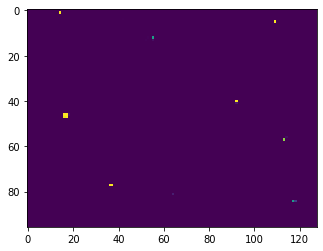

0 364.6003551483154


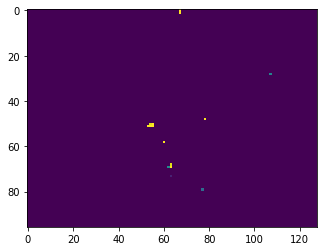

1 439.2875747680663


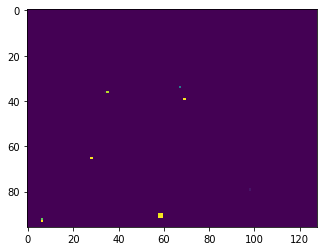

2 519.1490154266356


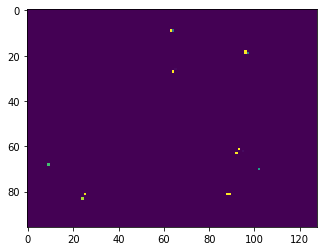

3 653.2083454132079


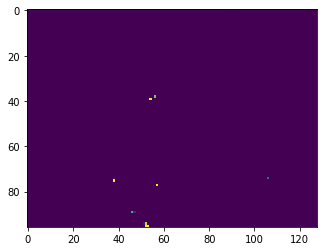

4 760.2737817764281


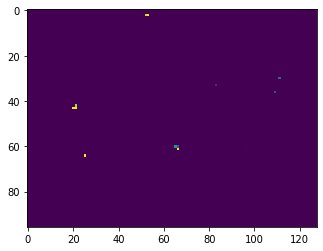

5 916.9482774734496


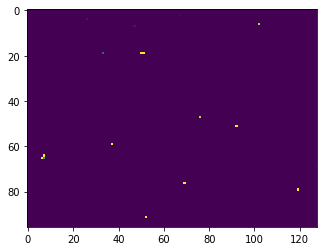

6 1000.204074859619


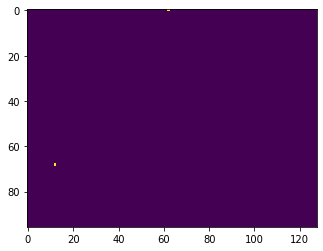

7 1165.1939911842346


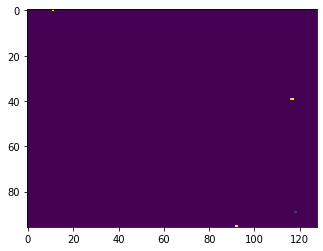

8 1210.0893654823303


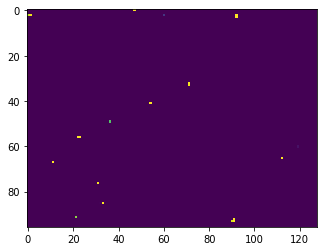

9 1261.5133156776428


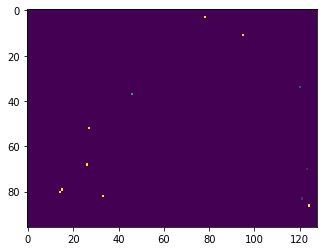

10 1343.4920716285706


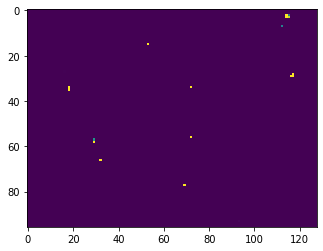

11 1352.2254252433777


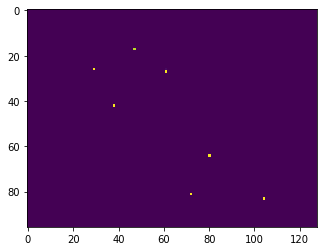

12 1454.297712802887


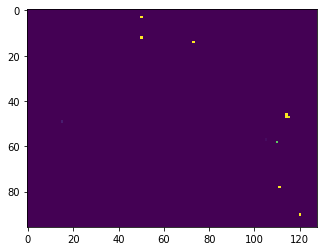

13 1479.468891620636


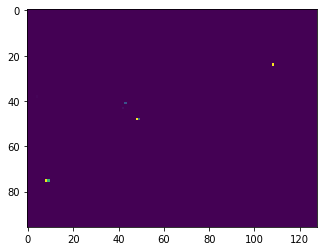

14 1617.261477947235


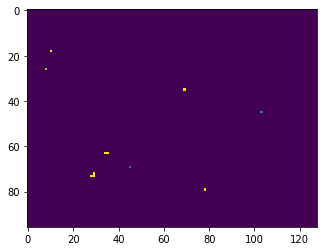

15 1856.5576357841494


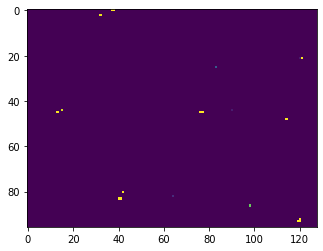

16 1876.302344799042


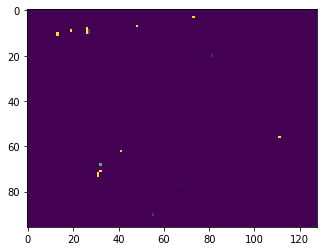

17 2096.9529118537903


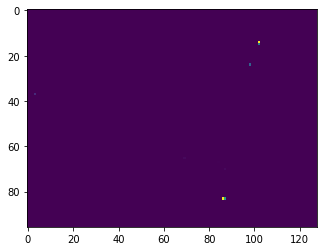

18 2214.4621999263763


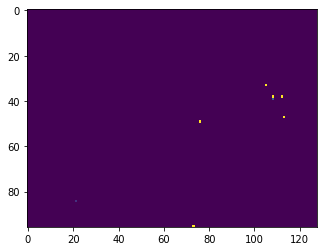

19 2231.016808271408


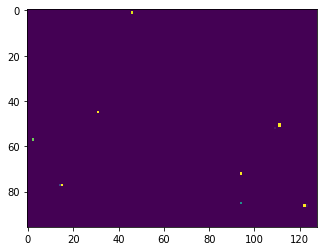

20 2425.4285476207733


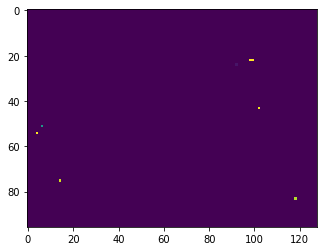

21 2532.0255596637726


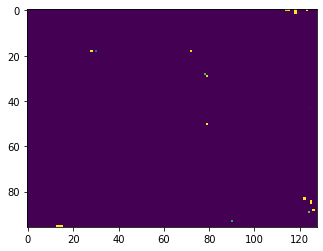

22 2542.8198635578156


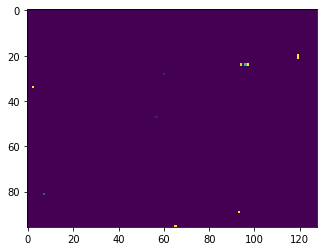

23 2760.727149248123


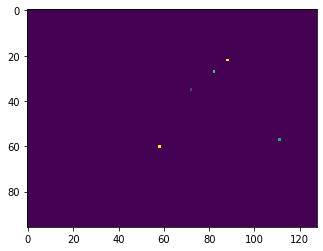

24 2830.0004227161407


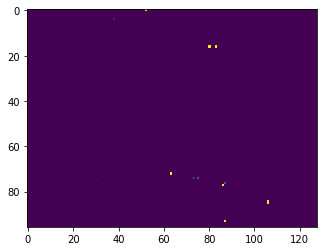

25 3051.2206766605377


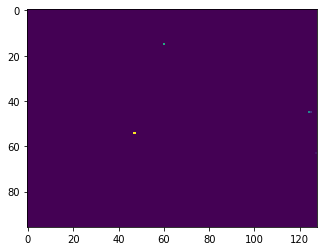

26 3156.0711295604706


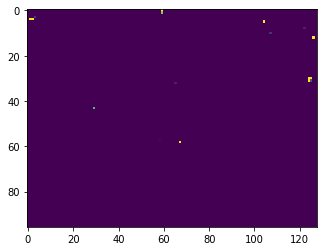

27 3191.807052373886


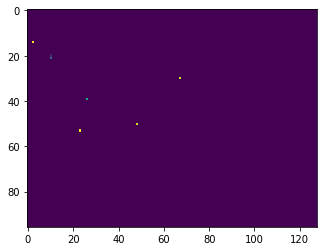

28 3386.8775923252106


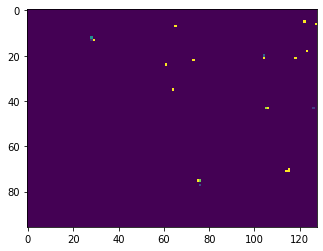

29 3521.9347212314606


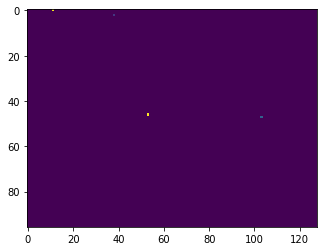

30 3552.476589679718


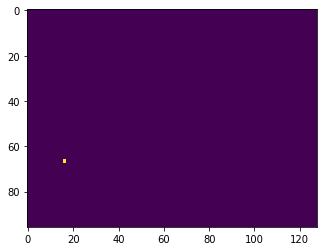

31 3621.4747614860535


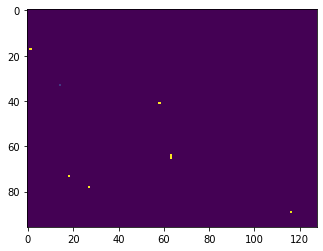

32 3665.3377056121826


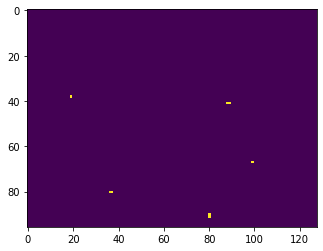

33 3823.3732290267944


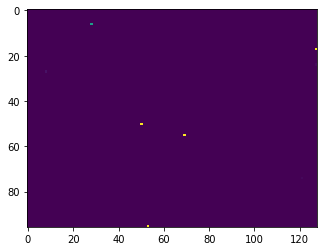

34 3854.7154326438904


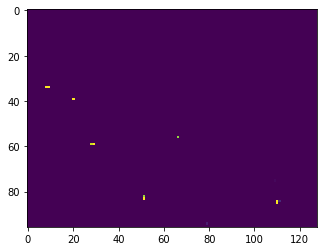

35 4035.8935799598694


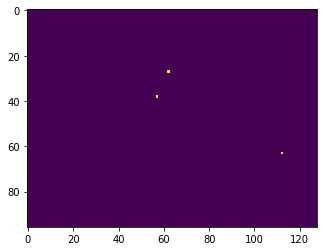

36 4080.888882637024


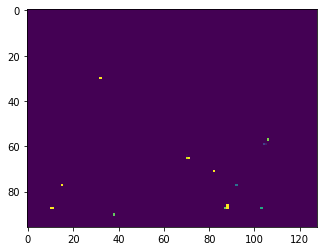

37 4147.352986335754


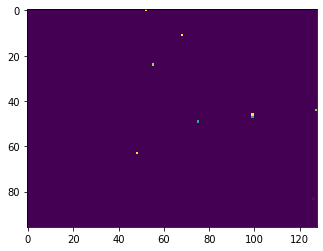

38 4405.377442359924


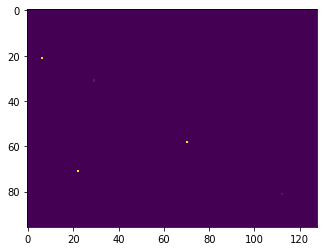

39 4533.219446659088


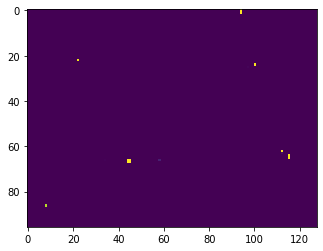

40 4569.191796779633


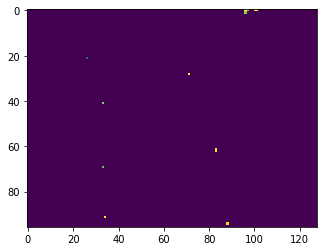

41 4617.695339679718


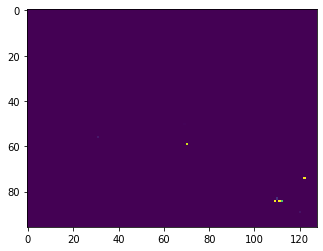

42 4701.790141582489


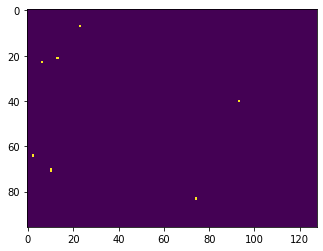

43 4836.80125951767


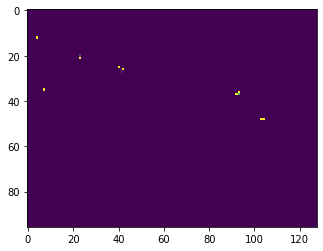

44 4874.809388637543


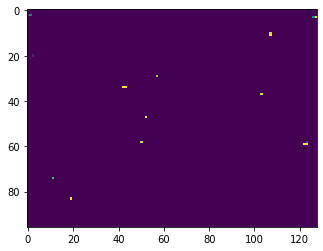

45 4922.177825450897


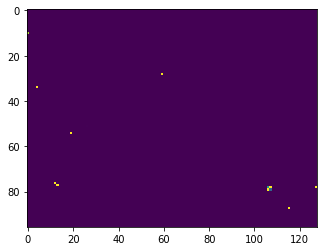

46 5103.4496512413025


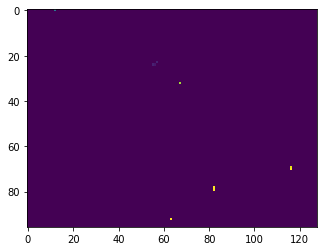

47 5234.948472976685


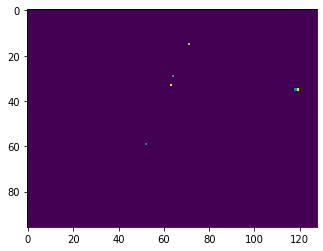

48 5387.7087144851685


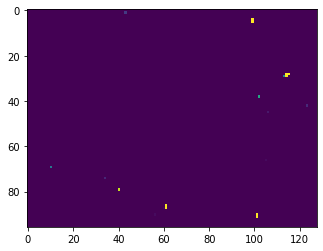

49 5570.758690834045


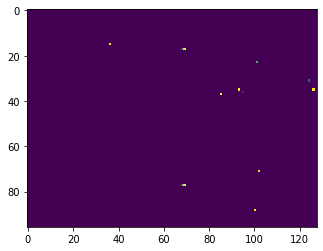

50 5709.922525405884


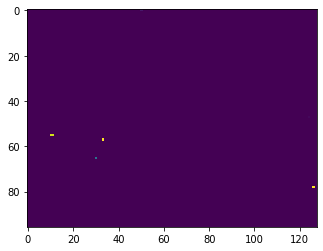

51 5806.5768966674805


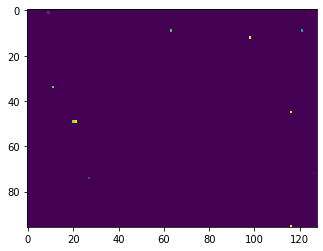

52 5995.282616615295


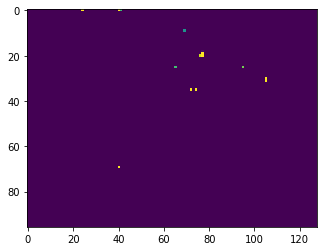

53 6042.617317199707


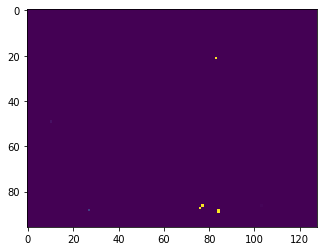

54 6048.390419483185


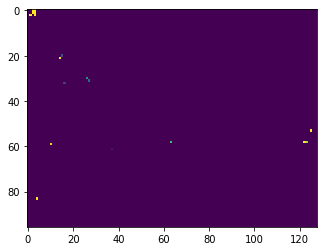

55 6214.511694431305


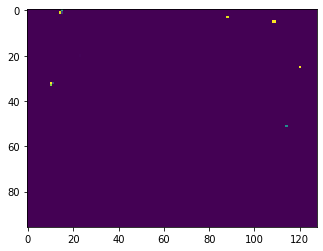

56 6312.274710178375


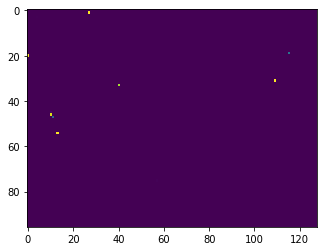

57 6501.70552444458


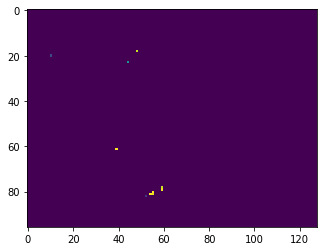

58 6573.000517368317


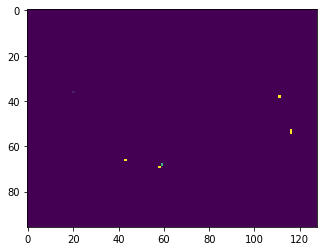

59 6631.242494106293


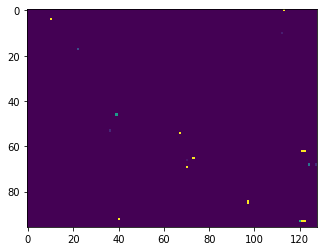

60 6781.107144832611


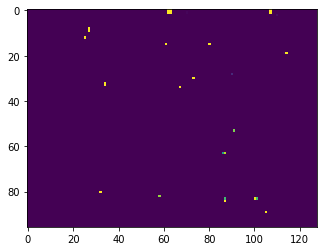

61 6849.447930812836


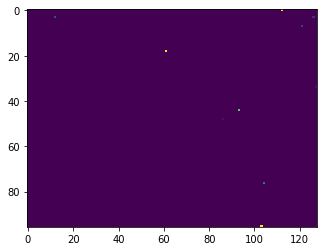

62 6916.669271945953


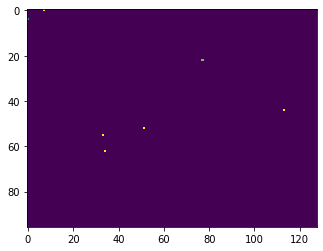

63 6973.376847267151


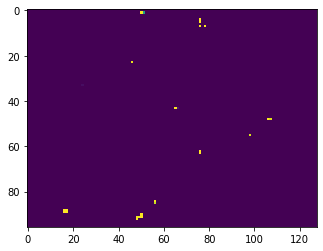

64 7003.964310646057


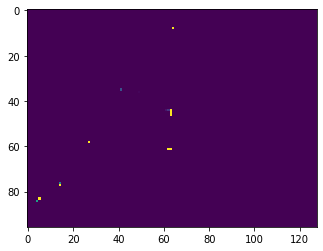

65 7099.485277175903


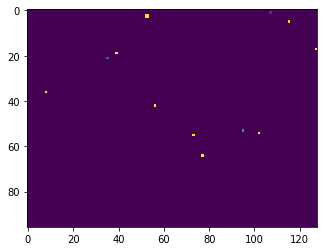

66 7142.36701965332


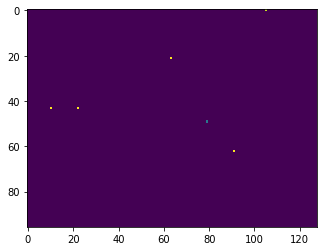

67 7189.052059650421


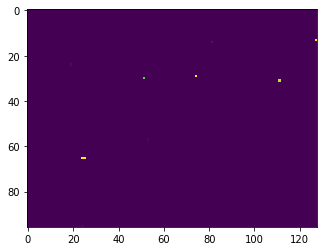

68 7316.246423244476


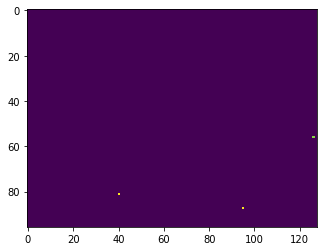

69 7392.416879653931


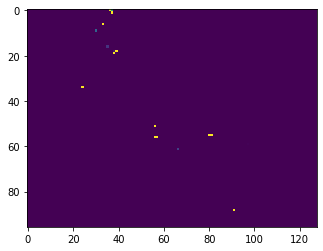

70 7423.114359855652


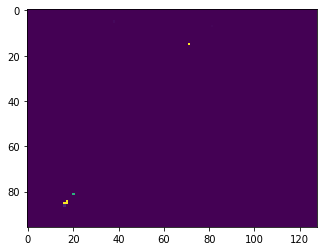

71 7866.3301639556885


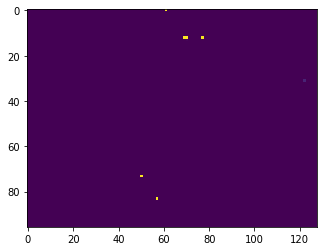

72 7889.2240200042725


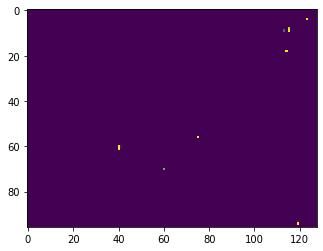

73 7970.106578826904


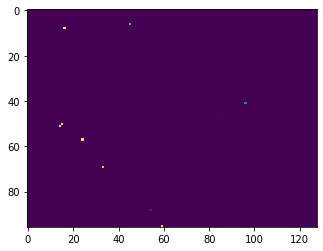

74 8139.87948513031


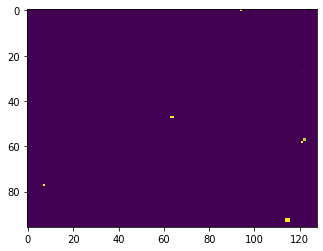

75 8144.860030174255


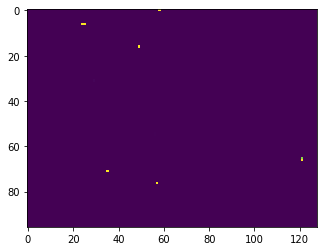

76 8182.013031959534


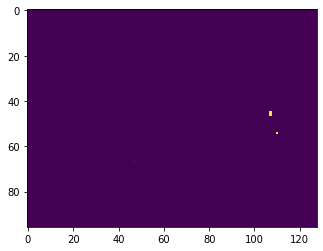

77 8248.988229513168


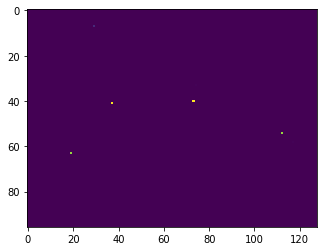

78 8432.166126728058


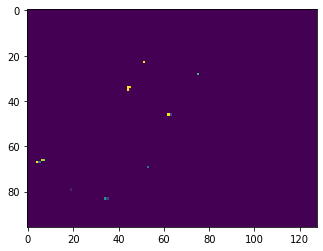

79 8463.016929149628


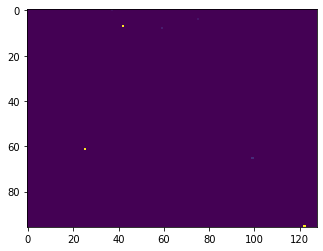

80 8513.733420610428


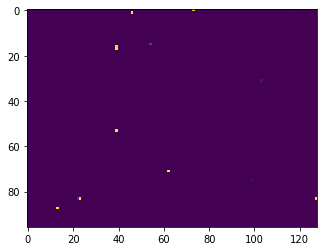

81 8583.356471300125


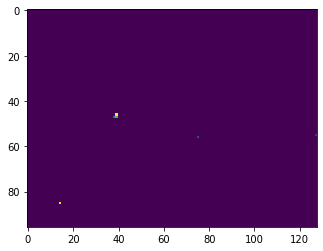

82 8627.9272544384


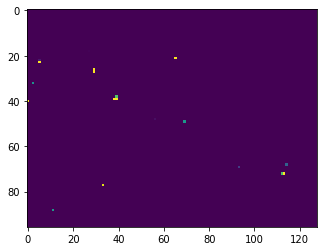

83 8778.302026510239


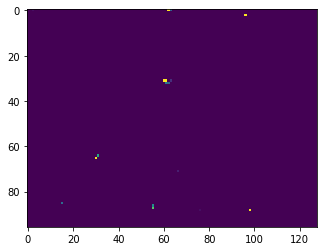

84 8869.740854024887


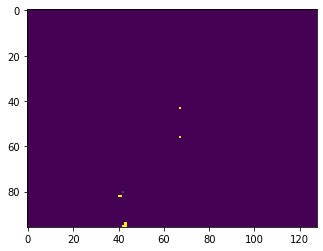

85 8919.625881910324


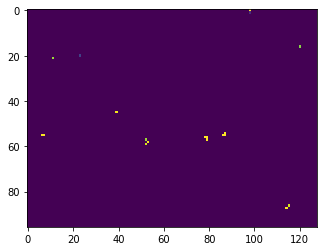

86 9041.883129835129


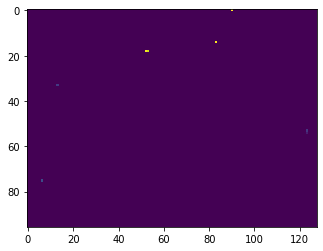

87 9157.304544210434


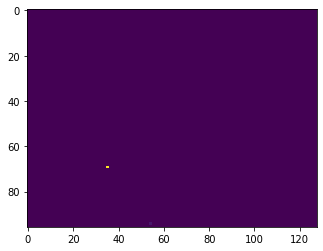

88 9185.39482396841


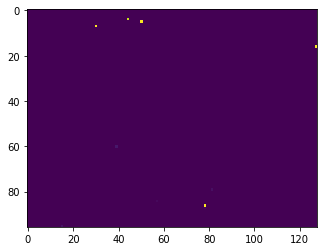

89 9431.27959150076


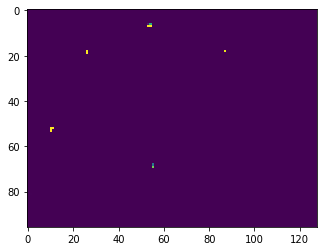

90 9558.399310052395


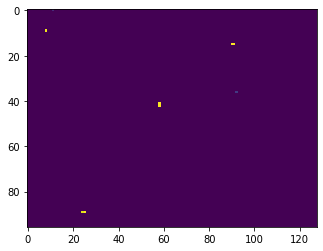

91 9612.164535939693


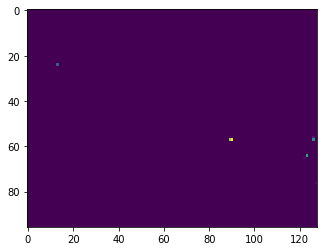

92 9778.676414430141


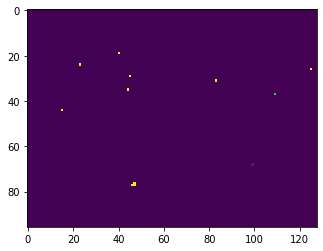

93 9963.923477113247


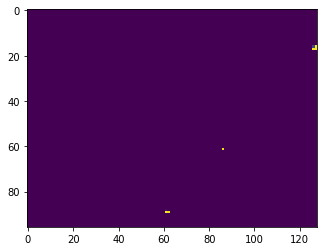

94 10134.725810468197


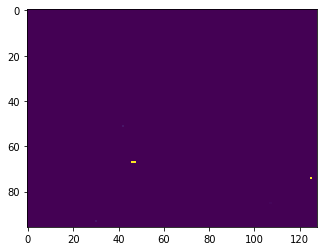

95 10454.599569261074


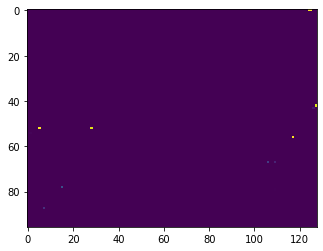

96 10510.937726914883


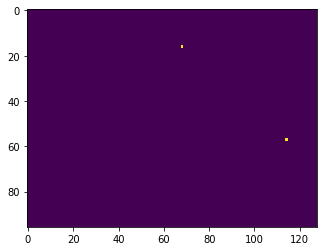

97 10548.933035314083


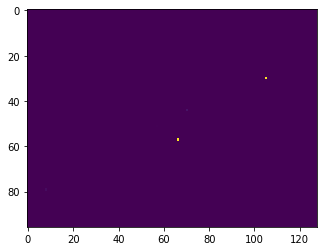

98 10722.838516652584


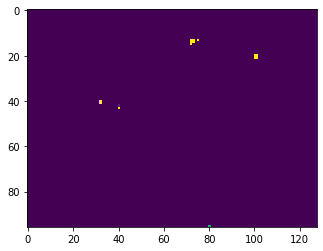

99 10916.118341863155


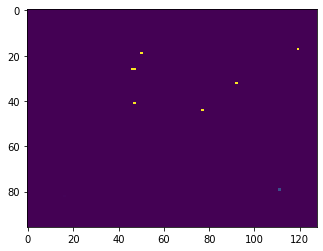

100 11190.869644582272


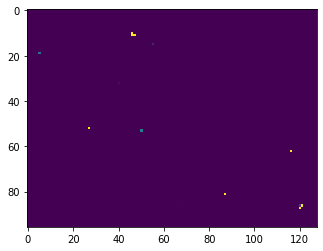

101 11222.740805089474


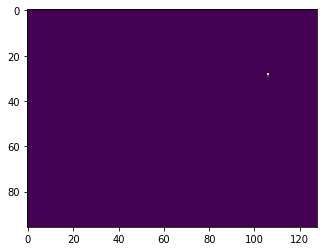

102 11326.551566660404


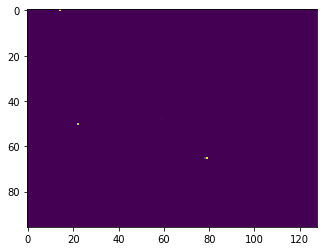

103 11600.399784624577


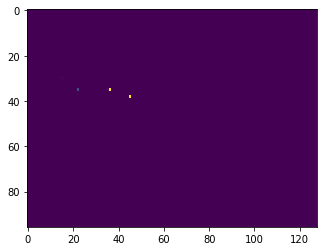

104 12137.094154894352


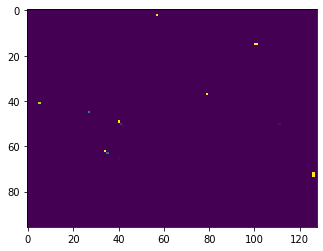

105 12340.141660273075


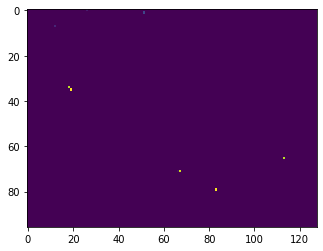

106 12521.974111139774


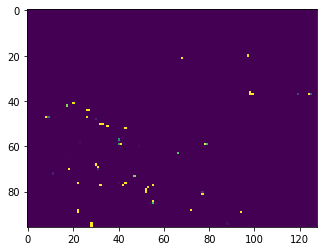

107 12527.714154779911


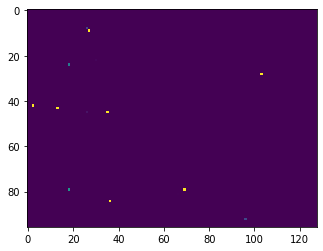

108 12703.284402430058


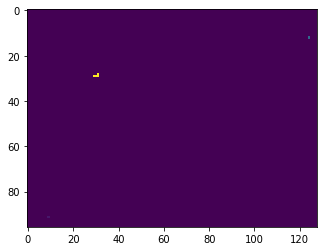

109 12757.871265947819


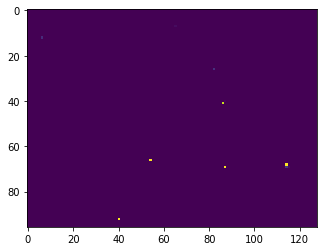

110 12809.442354738712


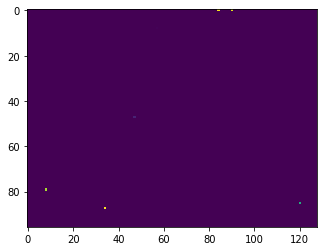

111 12837.8975186944


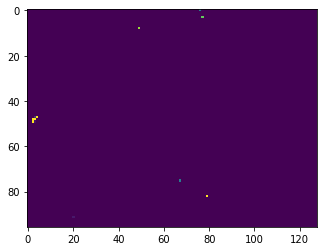

112 12877.141048014164


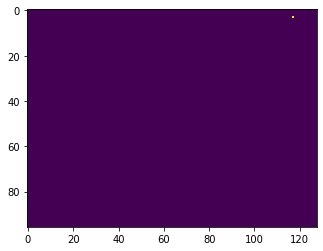

113 13043.229536294937


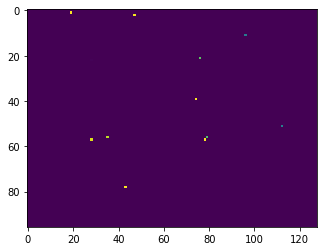

114 13072.029388666153


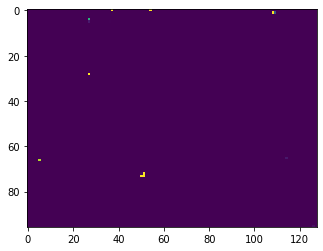

115 13128.999696016312


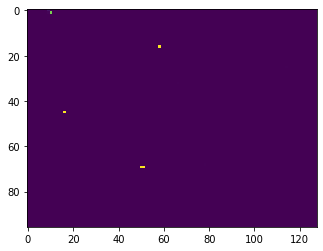

116 13213.108353376389


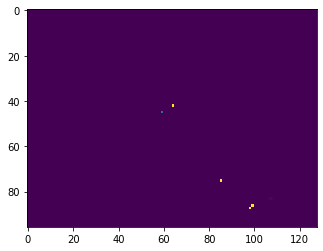

117 13292.709447145462


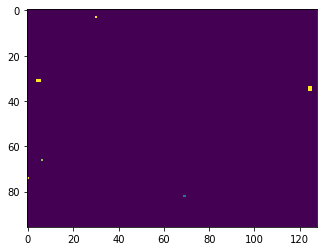

118 13302.517688035965


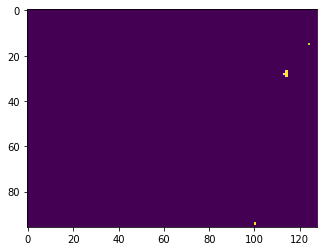

119 13366.633345842361


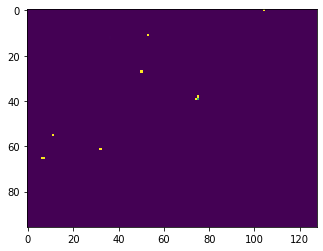

120 13584.013221979141


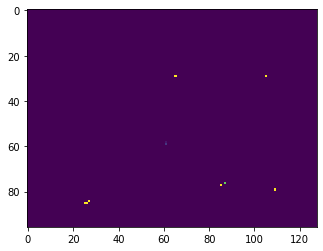

121 13635.02861046791


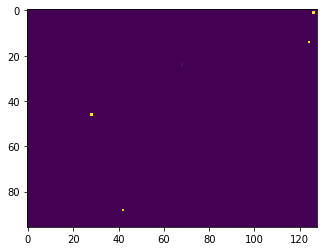

122 13693.028873443604


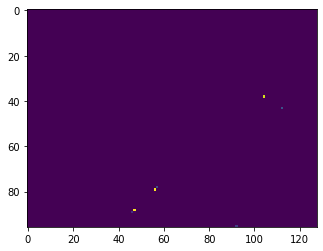

123 13848.256577014923


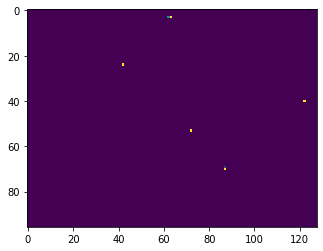

124 13931.59464263916


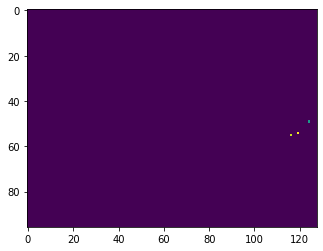

125 13983.117413520813


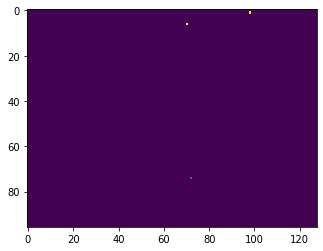

126 14070.749433755875


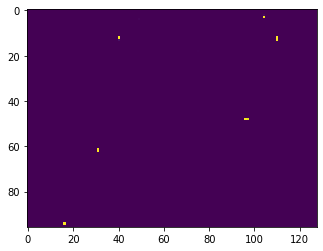

127 14140.691489458084


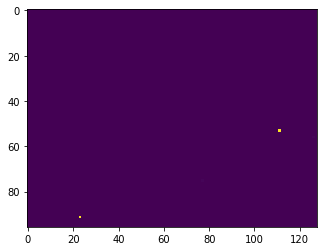

128 14300.664108514786


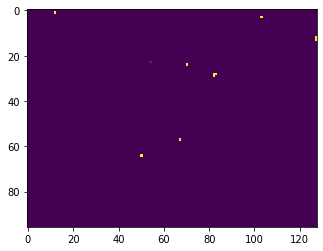

129 14344.483949899673


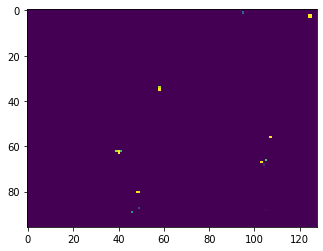

130 14485.056164979935


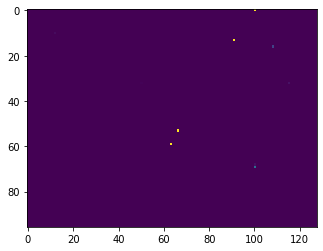

131 14574.36551976204


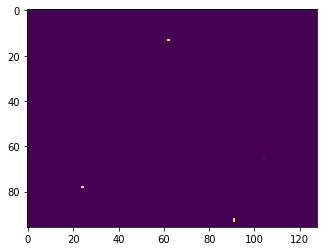

132 14616.340383291245


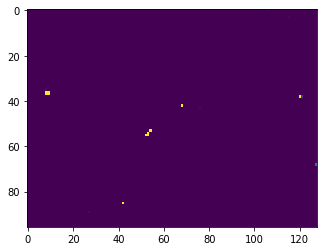

133 14747.601837873459


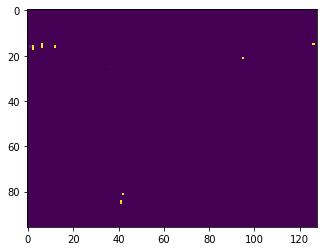

134 14866.524578809738


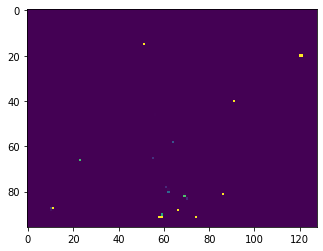

135 14897.229925870895


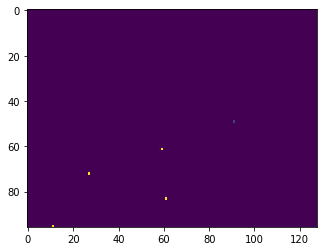

136 14963.08031964302


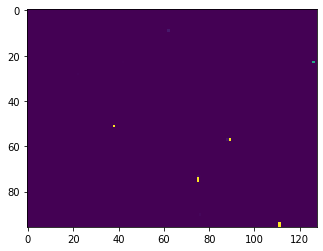

137 15219.283107995987


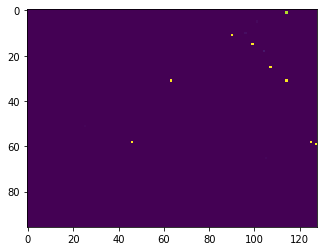

138 15292.22625374794


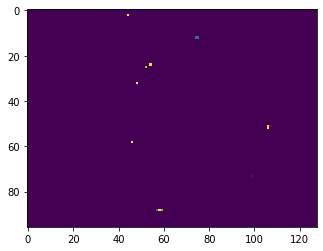

139 15499.456404924393


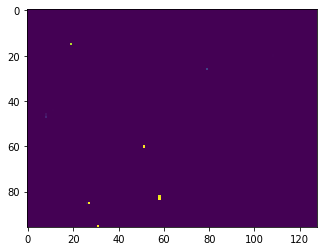

140 15603.198491811752


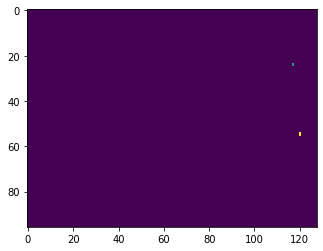

141 15904.666931390762


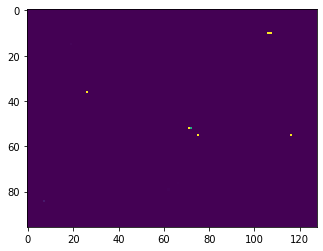

142 15964.966823339462


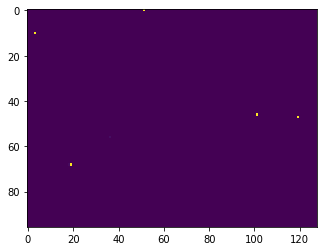

143 16165.896305322647


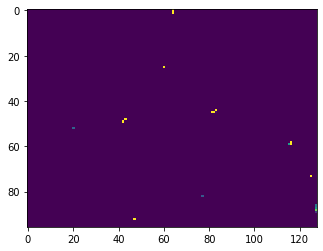

144 16477.83737397194


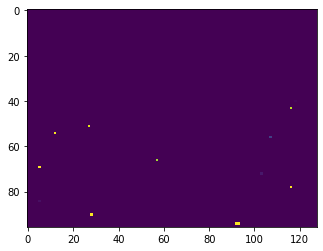

145 16752.779793024063


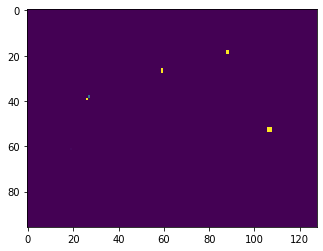

146 16828.382701158524


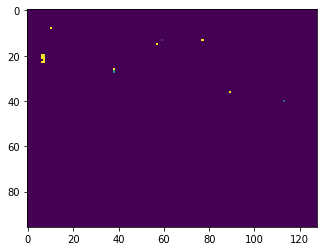

147 16989.391345262527


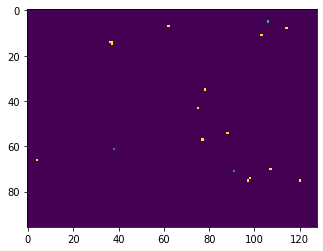

148 17115.736413240433


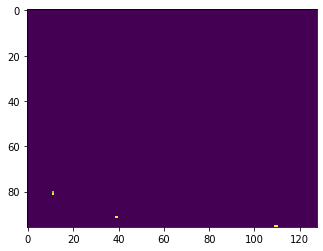

149 17158.907740354538


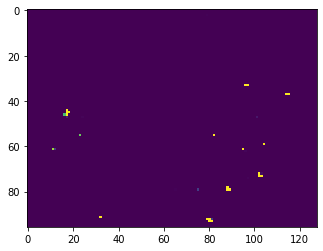

150 17368.809946775436


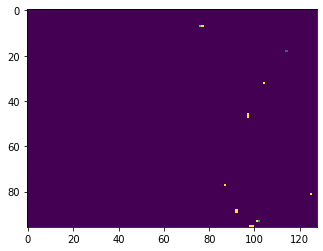

151 17416.13331770897


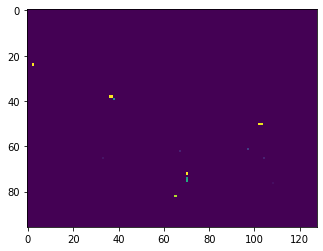

152 17486.188544034958


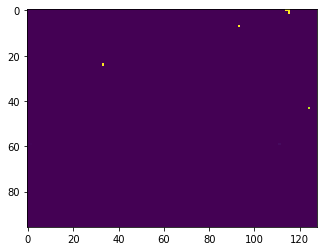

153 17624.23027062416


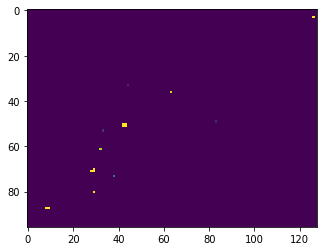

154 17786.621298074722


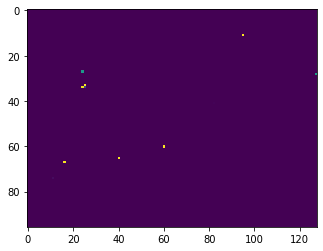

155 17874.300611257553


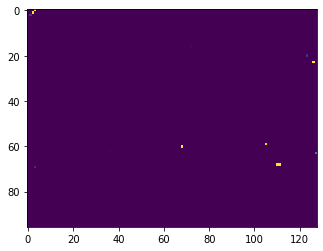

156 18060.368566274643


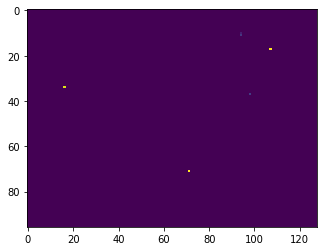

157 18228.99653983116


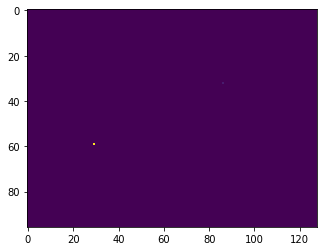

158 18321.920038938522


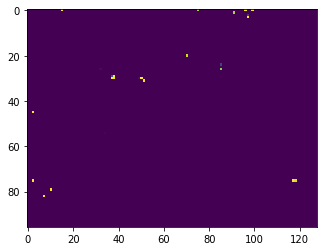

159 18344.72292780876


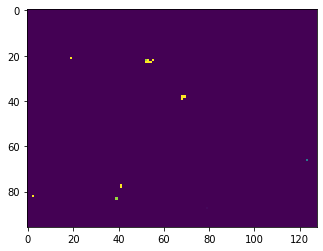

160 18478.60261797905


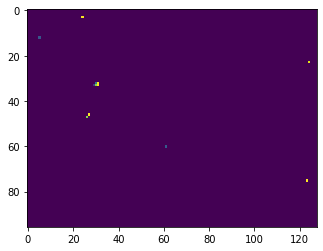

161 18567.87673354149


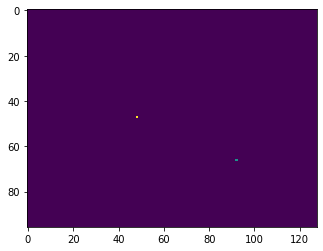

162 18594.382150411606


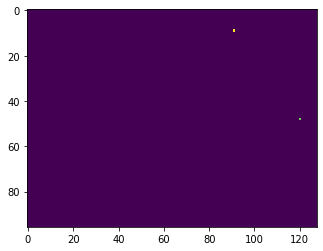

163 18640.572937488556


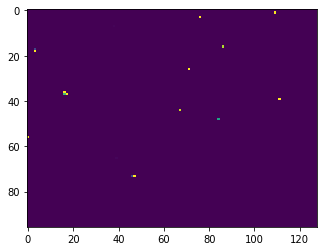

164 18681.999721050262


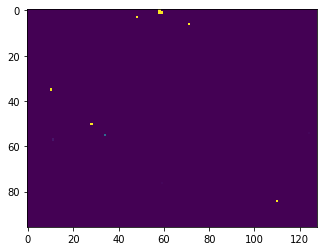

165 18745.572714328766


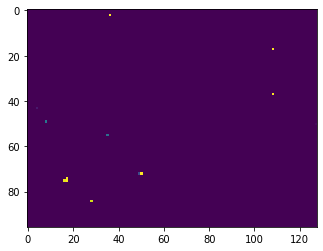

166 18846.570705890656


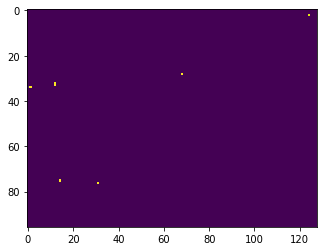

167 18988.50924062729


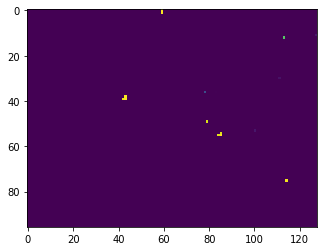

168 19020.550050258636


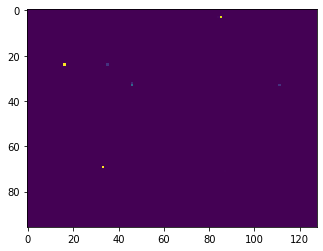

169 19199.843680858612


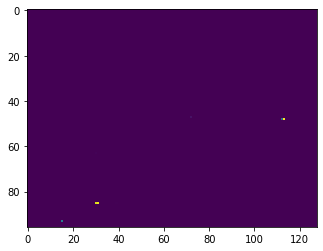

170 19334.054844379425


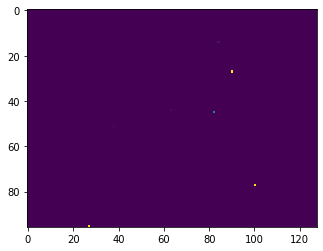

171 19843.551025390625


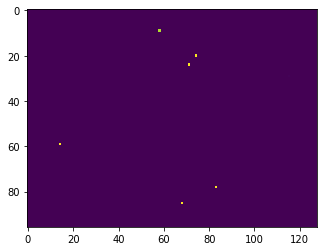

172 19968.6342754364


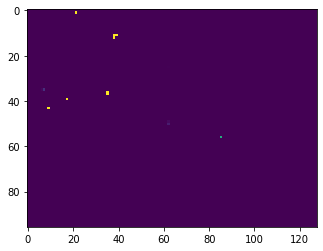

173 20105.739022254944


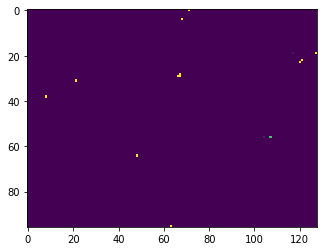

174 20184.80014705658


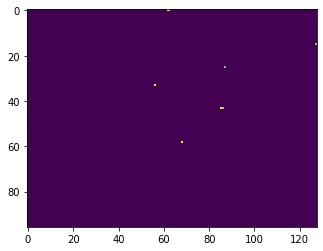

175 20300.313793182373


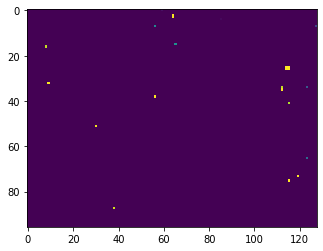

176 20386.78295135498


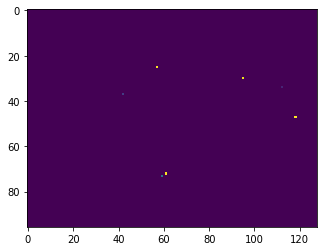

177 20405.128185749054


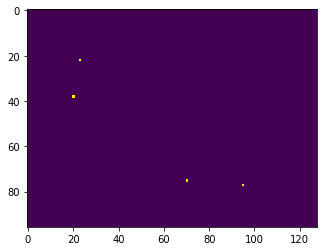

178 20433.129053354263


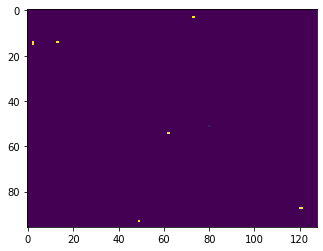

179 20836.09537911415


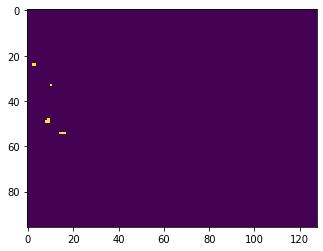

180 20985.16169857979


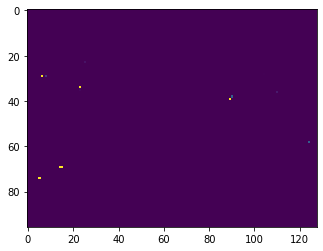

181 21142.261192560196


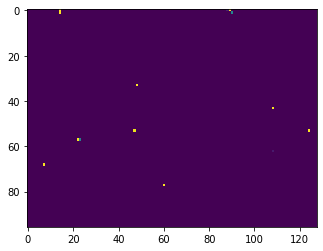

182 21185.222644090652


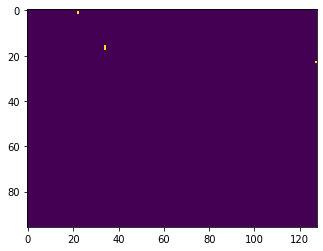

183 21275.2538022995


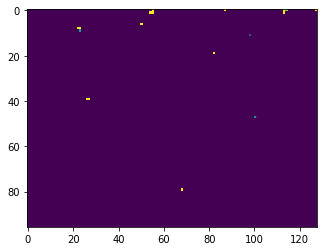

184 21423.975832939148


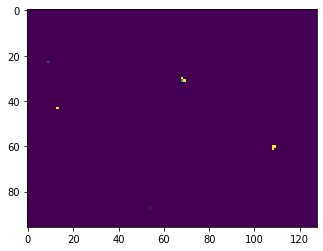

185 21544.190840244293


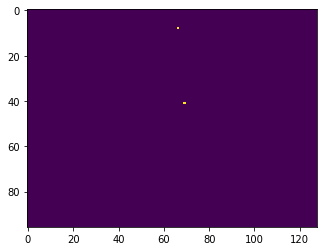

186 21599.187304496765


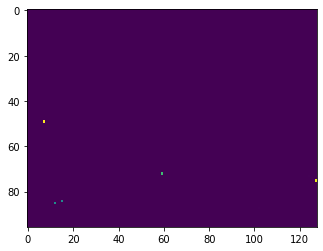

187 21898.54353451729


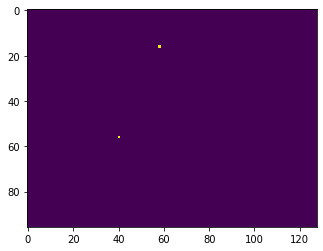

188 21956.55356812477


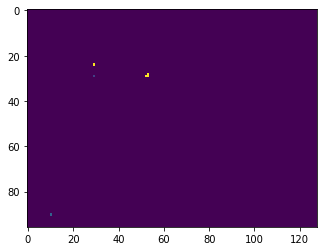

189 22127.049179315567


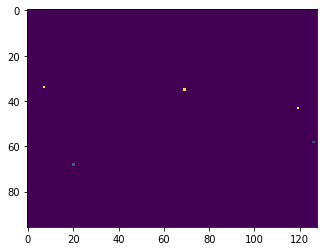

190 22246.449202537537


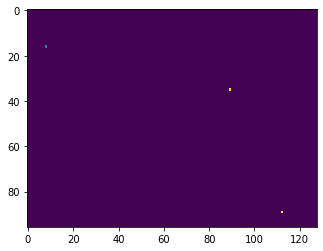

191 22508.954246520996


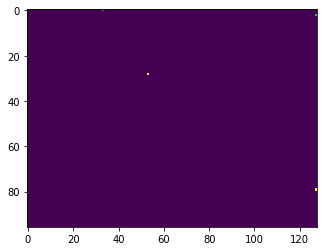

192 22544.1139793396


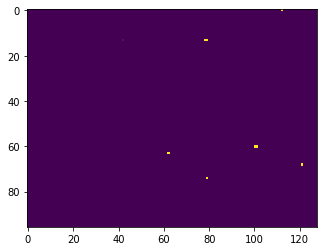

193 22586.026425361633


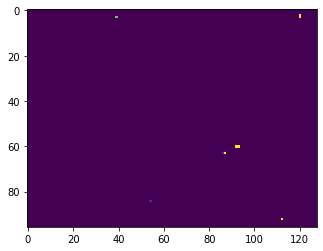

194 22671.862050056458


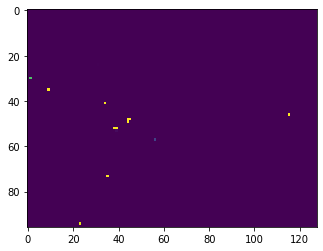

195 23136.944617271423


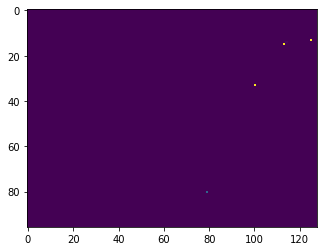

196 23333.58894753456


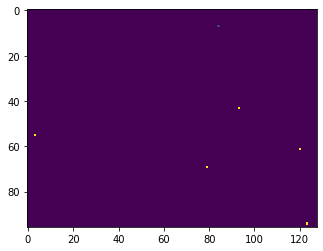

197 23381.391578912735


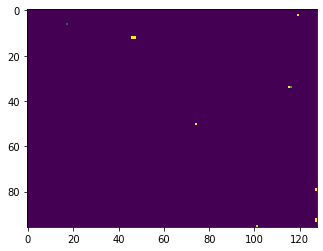

198 23391.660953760147


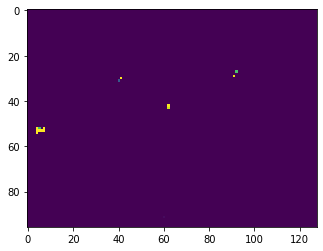

199 23430.02498269081


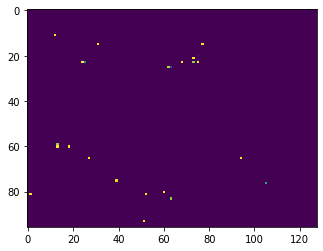

200 23556.27474808693


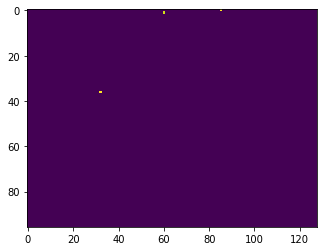

201 23690.340728998184


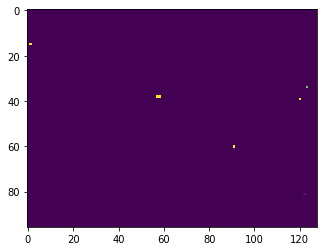

202 23896.42720103264


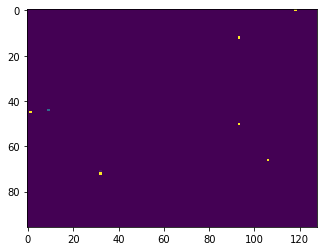

203 23947.01123404503


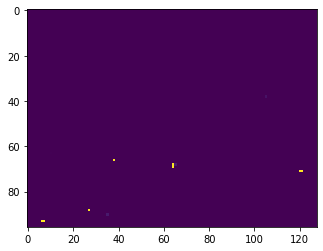

204 23947.802884817123


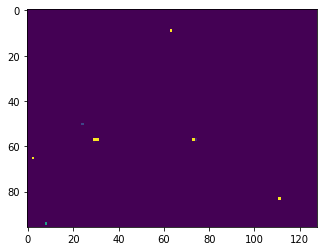

205 23990.91702723503


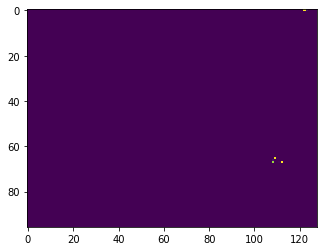

206 24048.952627182007


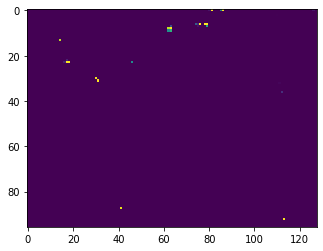

207 24332.418027877808


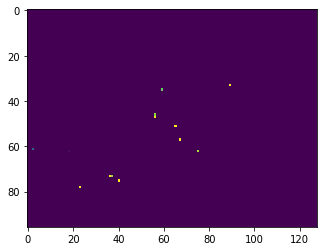

208 24497.787890434265


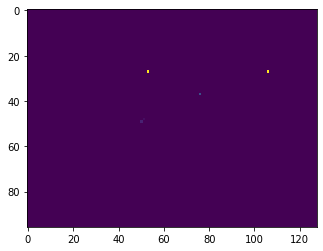

209 24792.413781642914


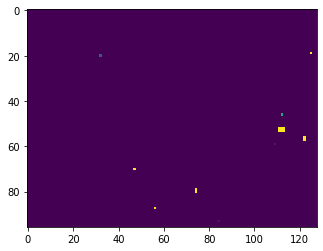

210 24976.380821704865


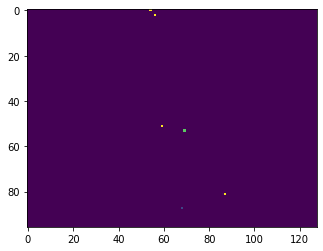

211 24997.395740032196


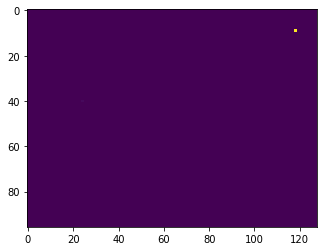

212 25037.368401050568


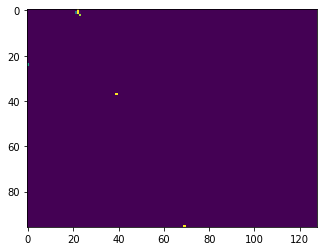

213 25068.520827293396


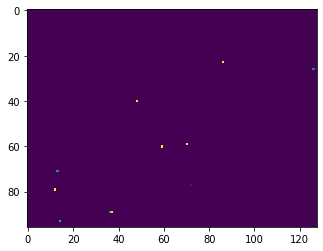

214 25240.232018470764


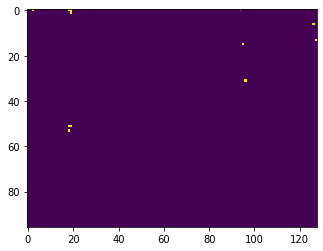

215 25263.97838783264


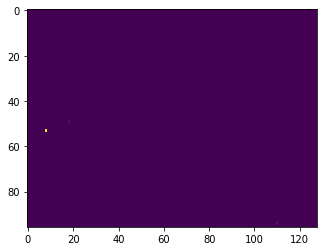

216 25369.855288386345


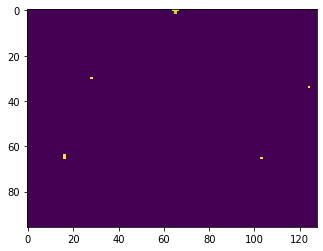

217 25395.97406089306


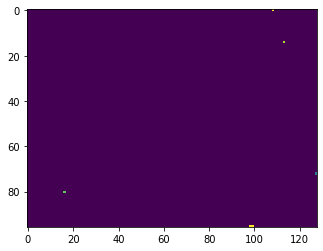

218 25580.905011057854


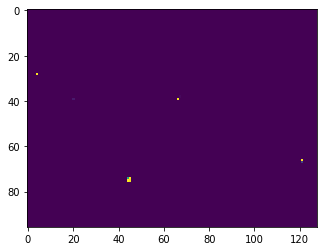

219 25666.055368304253


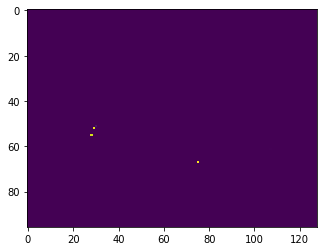

220 25703.068459153175


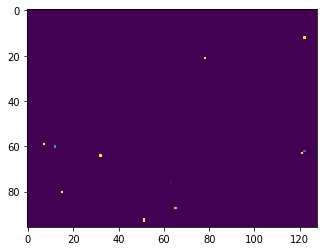

221 25786.119200348854


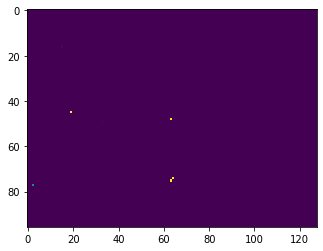

222 25836.61598455906


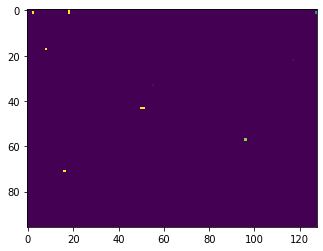

223 25895.14844763279


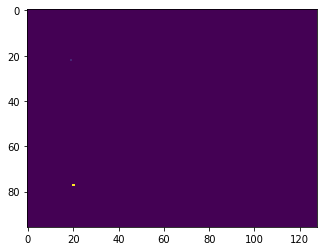

224 25953.044845104218


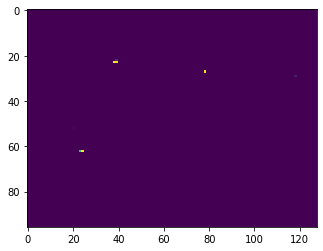

225 26196.16957139969


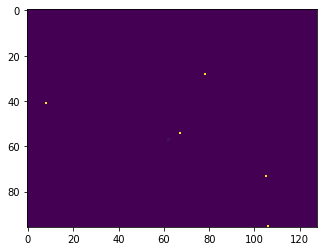

226 26655.170231342316


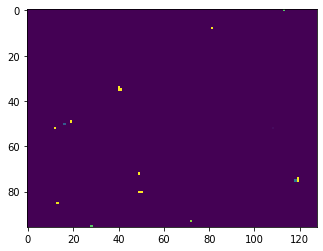

227 26799.161196231842


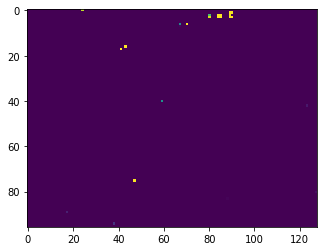

228 27022.257566928864


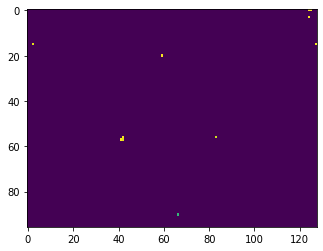

229 27069.75017976761


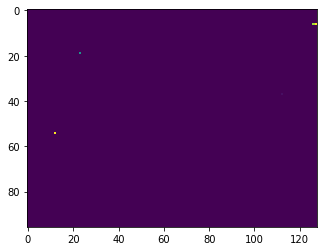

230 27250.34059858322


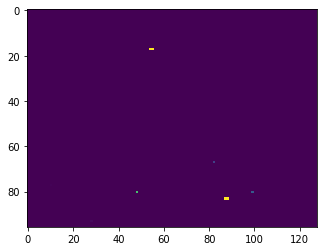

231 27276.109228134155


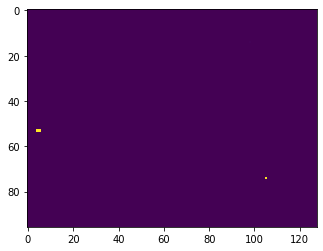

232 27319.100279808044


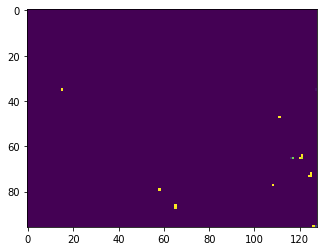

233 27336.055737495422


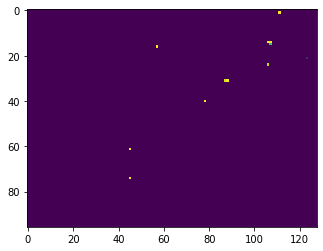

234 27421.434288978577


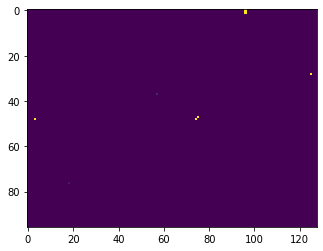

235 27466.232886314392


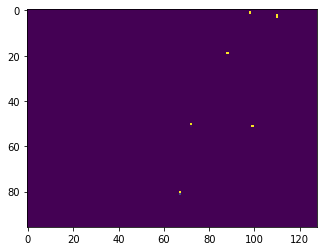

236 27520.00972700119


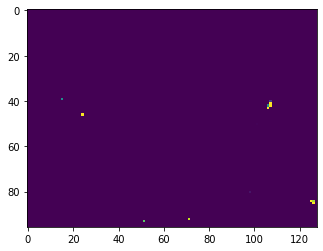

237 27558.27180337906


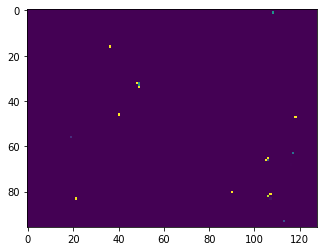

238 27589.739465236664


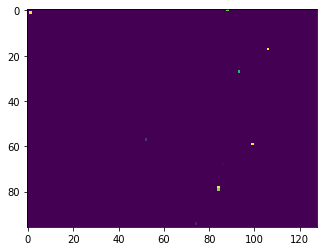

239 27669.20174741745


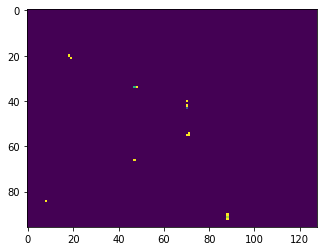

240 27761.412045001984


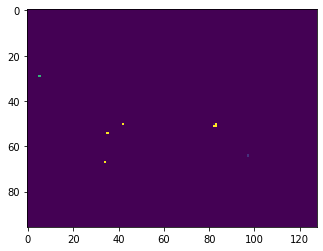

241 27935.563320159912


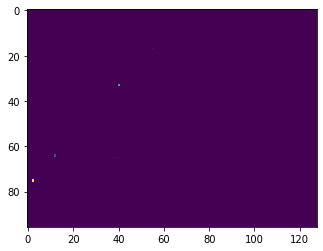

242 28023.632021784782


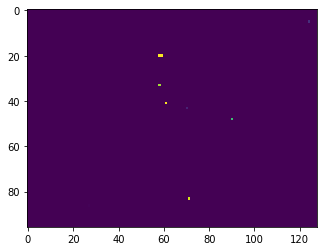

243 28108.881583571434


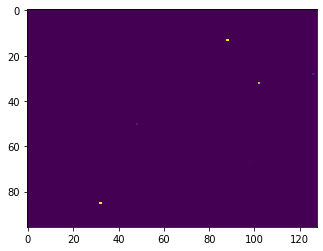

244 28161.83960020542


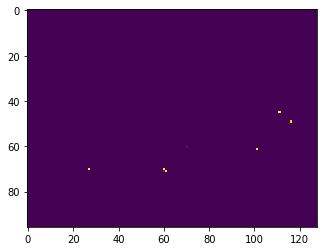

245 28207.70978319645


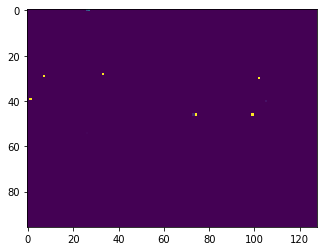

246 28279.940197110176


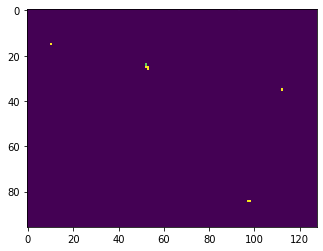

247 28404.188225388527


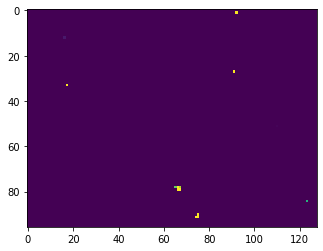

248 28484.811083436012


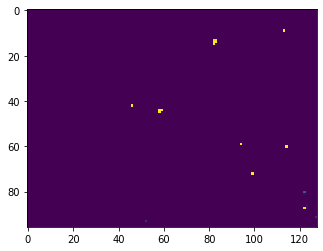

249 28617.289319634438


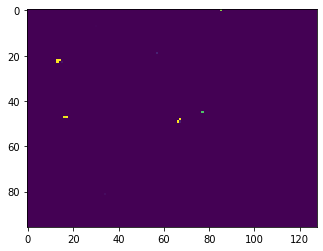

250 28680.48956167698


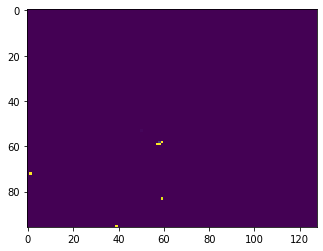

251 28935.332863926888


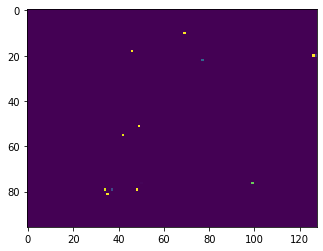

252 29395.93900692463


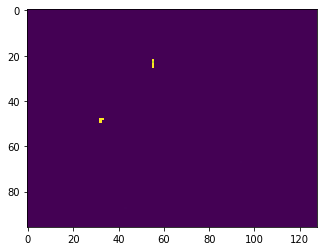

253 29687.014575123787


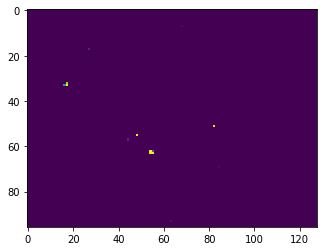

254 29732.881273388863


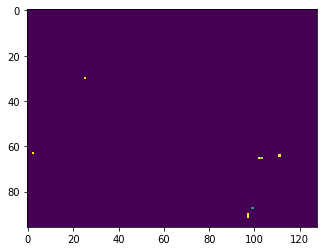

255 29879.430874943733


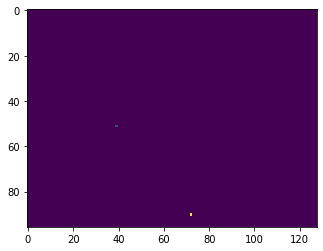

256 30089.206089138985


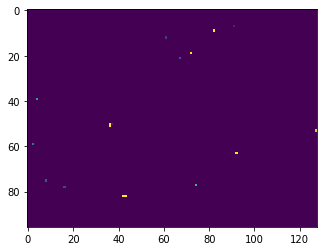

257 30244.432269215584


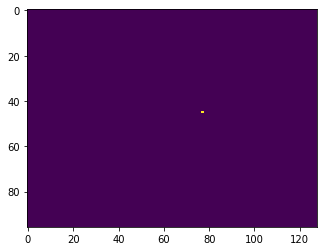

258 30267.431488275528


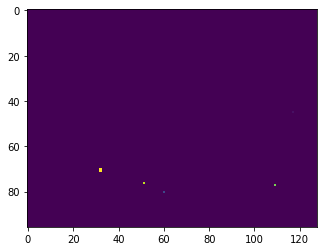

259 30594.467770576477


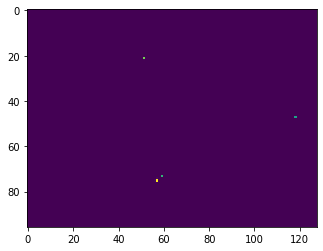

260 30722.405585050583


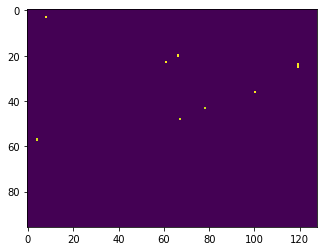

261 30793.606293439865


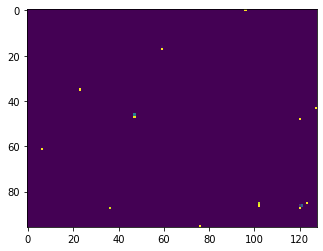

262 30853.868942975998


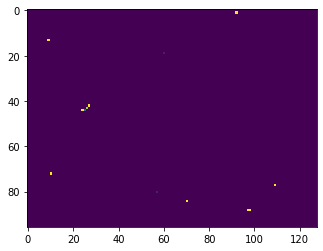

263 30947.56898856163


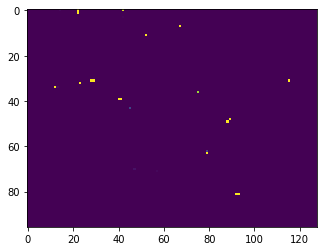

264 30986.26889014244


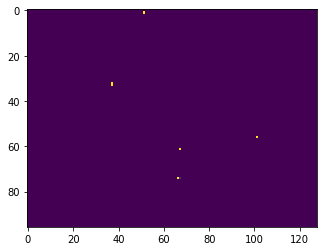

265 31053.183725595474


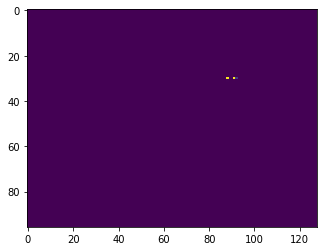

266 31099.00797700882


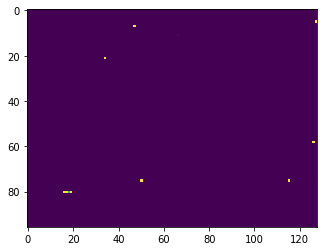

267 31143.31467962265


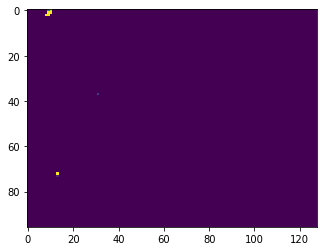

268 31255.72831106186


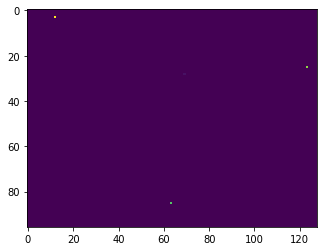

269 31505.118600845337


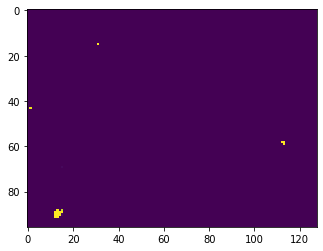

270 31685.185554504395


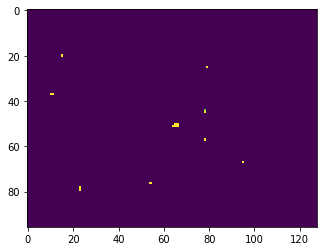

271 31898.363790512085


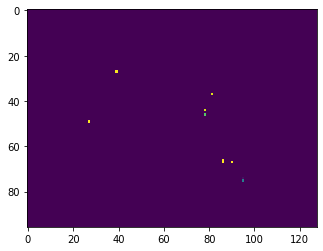

272 31983.255702018738


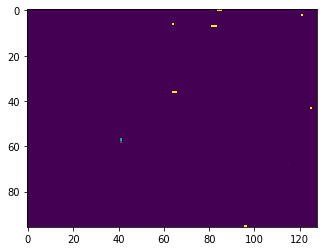

273 32187.360032081604


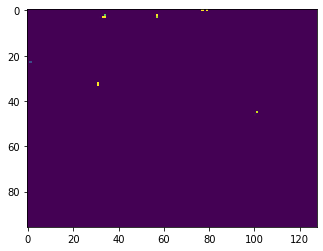

274 32228.541390419006


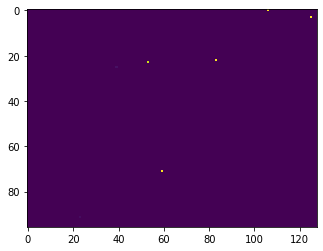

275 32275.529794216156


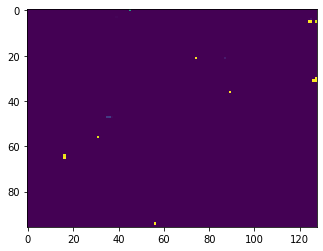

276 32350.545215129852


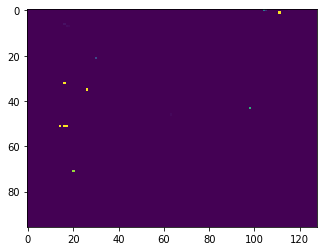

277 32403.1477599144


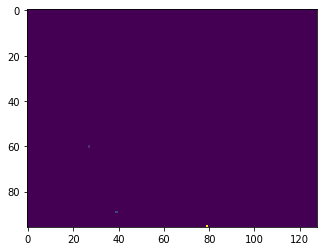

278 32830.80526649952


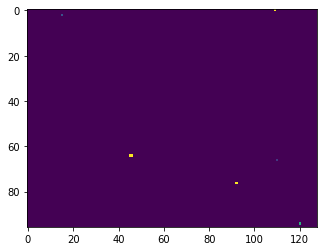

279 32884.730713009834


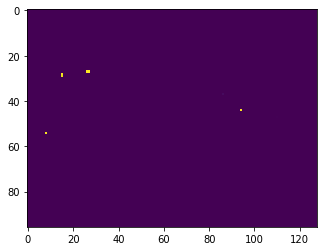

280 32944.720262646675


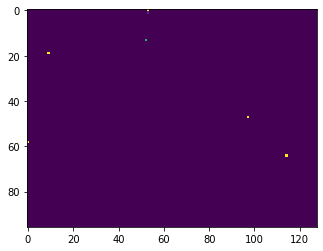

281 32966.969970822334


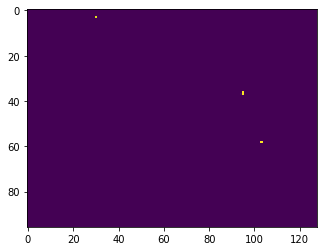

282 32982.971569657326


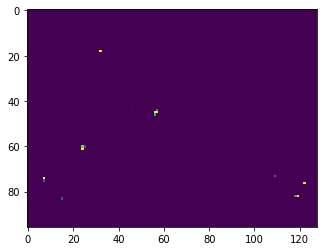

283 32986.214928269386


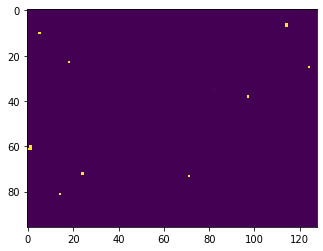

284 33078.162390351295


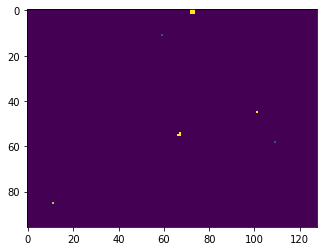

285 33115.78693544865


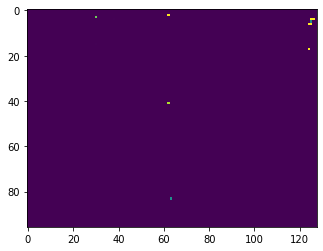

286 33169.11874639988


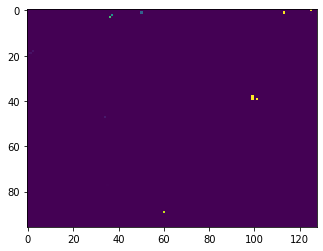

287 33257.458206772804


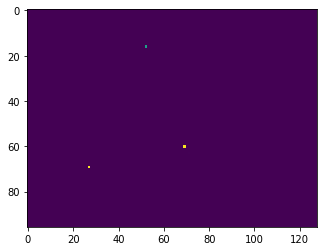

288 33341.888098835945


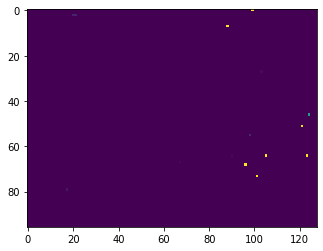

289 33357.92094004154


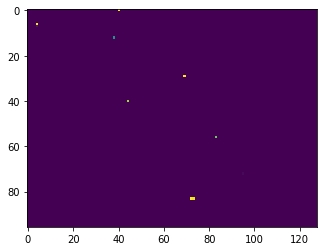

290 33411.74776136875


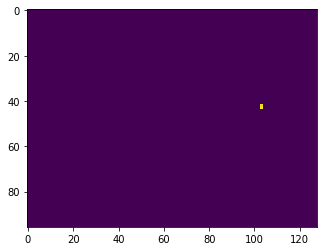

291 33481.768419384956


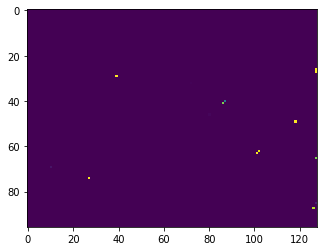

292 33588.701186299324


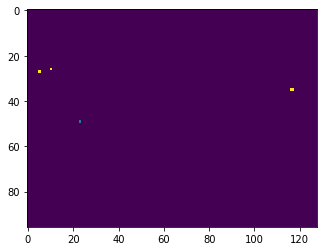

293 33692.2667876482


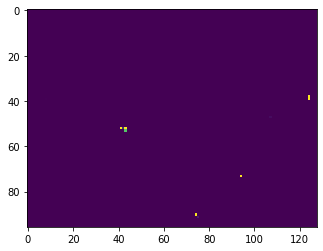

294 33816.25858223438


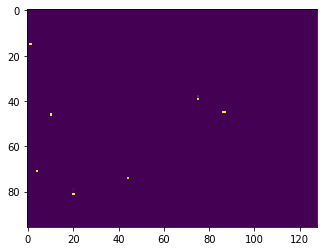

295 33868.23285019398


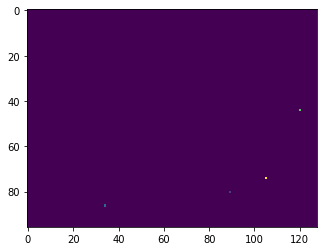

296 33932.95041382313


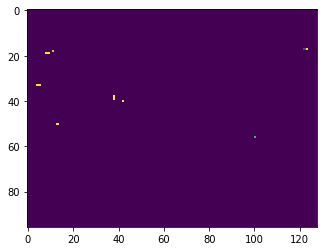

297 34175.121428608894


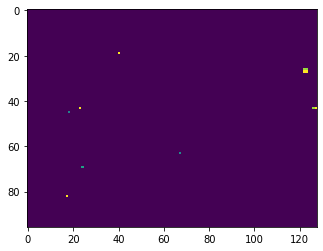

298 34203.03834545612


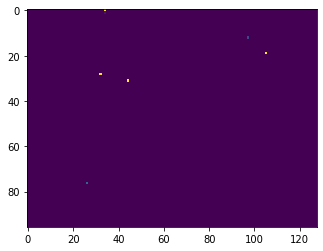

299 34226.429683327675


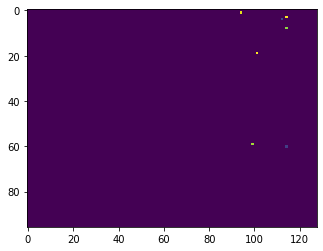

300 34328.34122955799


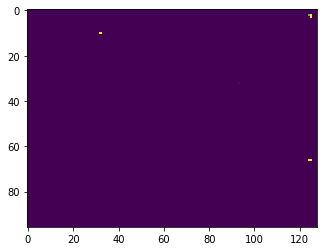

301 34517.60347759724


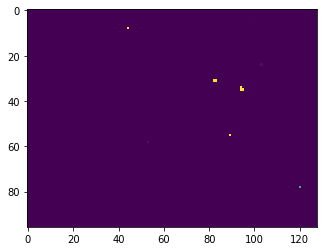

302 34809.789165616035


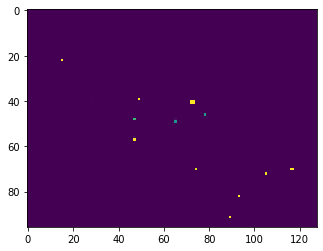

303 34845.031485676765


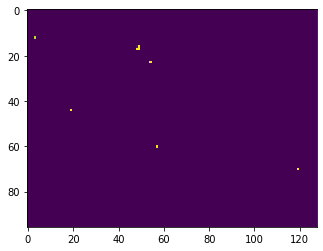

304 35342.11060965061


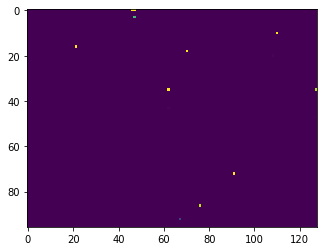

305 35400.36607992649


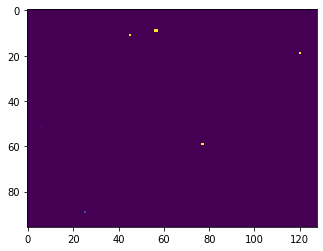

306 35439.0857578516


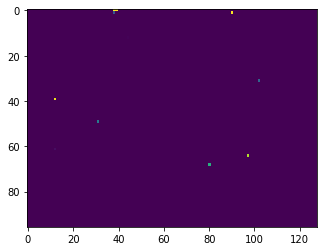

307 35520.514263272285


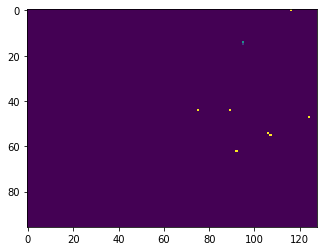

308 35725.85916531086


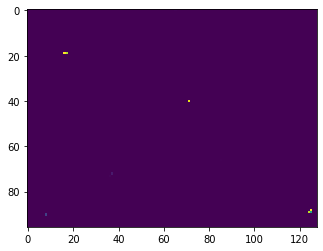

309 35811.20544350147


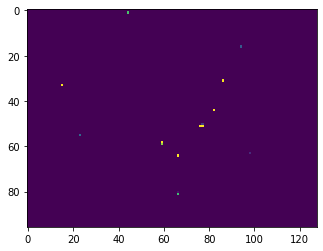

310 36074.97620880604


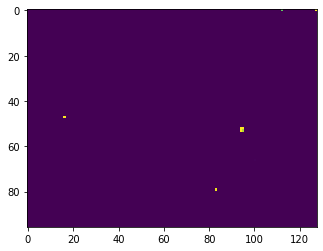

311 36121.33901035786


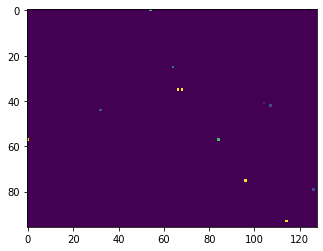

312 36255.59590113163


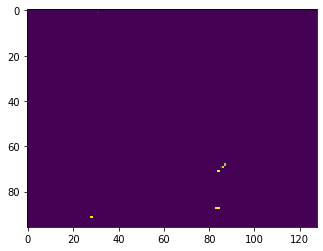

313 36371.68922293186


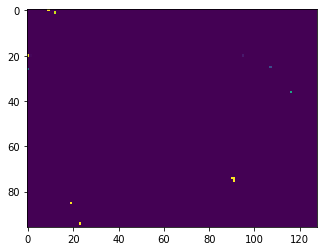

314 36419.45156157017


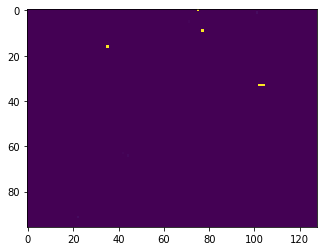

315 36574.34176504612
Average MAE:  115.74158786407


In [11]:
mae = 0
cmap = plt.cm.jet
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    
    file_path = img_paths[i]
    file_name = file_path.split('/')[-1].split('.')[0]
    image_name = os.path.join(fd_name, file_name + '_dmap.png')
    #print(file_name)
    
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    #groundtruth = cv2.resize(groundtruth,(320,320),interpolation = cv2.INTER_CUBIC) 
    
    output = model(img.unsqueeze(0))
    imshow(output)
    
    image = output.cpu().clone()
    image = image.squeeze(0)
    img = transforms.ToPILImage()(image)
    
    plt.imsave(image_name, img, cmap=cmap)
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print ('Average MAE: ', mae/len(img_paths))

In [ ]:
# Small testing
image_name = os.path.join(fd_name, file_name + '_dmap.png')
print(image_name)
#save_image(output, image_name)
image = output.cpu().clone()
image = image.squeeze(0)
img = transforms.ToPILImage()(image)
plt.imshow(img)
cmap = plt.cm.jet
plt.imsave('output.png', img, cmap=cmap)
output.size()